# Diffrent Types Of Masks 
### In this part we create and display different type of mask to use us in the next parts of the objects

#### First lets get a preview of the final result

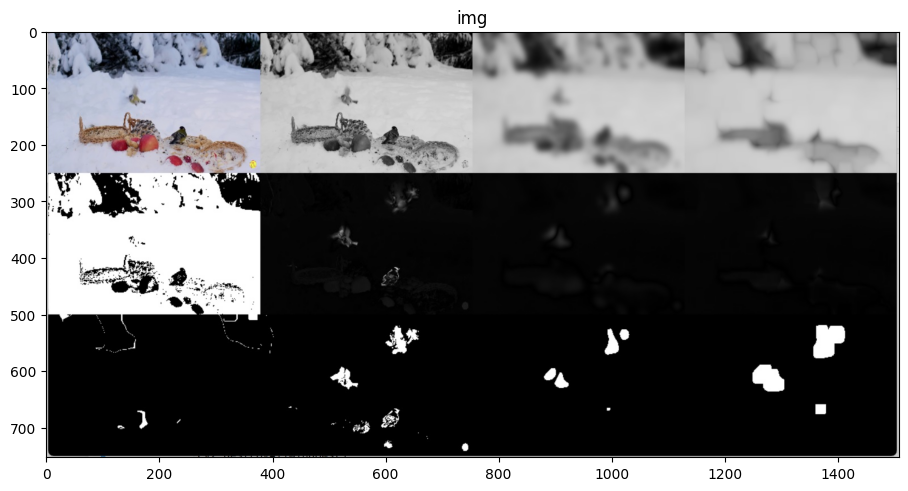

In [1]:
import matplotlib.pyplot as plt

ROW, COL = 10, 11

img = plt.imread(r'C:\')

fig, ax = plt.subplots(1, 1, figsize=(COL,ROW))
    
plt.title("img")
plt.imshow(img)

### Import libraries and set the camera

In [2]:
import cv2
import numpy as np

from collections import deque
from timeit import default_timer as timer

# Catch frame from webcam
camera = cv2.VideoCapture(1)

### Define Variables

In [3]:
# Define the tresh hold of the masks
DIFF_TRESH_HOLD = 19  # Should be low
MASK_TRESH_HOLD = 100 # Should be high

# Define variables for hight and width shape of the frames
HEIGH, WIDTH = 200, 300   

# Initialize last frame variable
last_frame = np.zeros((HEIGH, WIDTH,3) , np.uint8)

# Initializing deque object for center points of the detected object
points = deque(maxlen=50)

# Restart timer for FPS
fps_start = timer()    
    
# Increasing FPS counter
counter_fps = 0

# Define FPS Variable
FPS = 0

### Build different types of masks

In [4]:
def mask1(frame_rgb):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(frame_gray)       
    
    return mask_frame

def mask2(frame_rgb):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    # Create one more frame with Gaussian blur
    frame_gray = cv2.GaussianBlur(frame_gray, (25, 25), 0)  

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(frame_gray)       
    
    return mask_frame

def mask3(frame_rgb):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    # Create one more frame with Gaussian blur
    frame_gray = cv2.GaussianBlur(frame_gray, (25, 25), 0)  
    
    # Dilates the object in the frame
    dilated_frame = cv2.dilate(frame_gray, None, iterations = 5) 

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(dilated_frame)       
    
    return mask_frame

def mask4(frame_rgb, last_frame):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    # Function exclude values that ara more than treshhold = 15 0 and more than 255
    _, frame_rgb_mask = cv2.threshold(frame_gray, MASK_TRESH_HOLD, 255, cv2.THRESH_BINARY)

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(frame_rgb_mask)        
    
    return mask_frame

def mask5(frame_rgb, last_frame):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    # Converting captured frame to GRAY by OpenCV function        
    last_frame = cv2.cvtColor(last_frame, cv2.COLOR_BGR2GRAY)
     
    # Return mask to detect change between two frames   
    abs_diff = cv2.absdiff(frame_gray, last_frame)

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(abs_diff)               
    
    return mask_frame

def mask6(frame_rgb, last_frame):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    # Create one more frame with Gaussian blur
    frame_gray = cv2.GaussianBlur(frame_gray, (25, 25), 0)  
    
    # Converting captured frame to GRAY by OpenCV function        
    last_frame = cv2.cvtColor(last_frame, cv2.COLOR_BGR2GRAY)
    
    # Create one more frame with Gaussian blur
    last_frame = cv2.GaussianBlur(last_frame, (25, 25), 0)  
     
    # Return mask to detect change between two frames   
    abs_diff = cv2.absdiff(frame_gray, last_frame)

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(abs_diff)               
    
    return mask_frame

def mask7(frame_rgb, last_frame):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    # Create one more frame with Gaussian blur
    frame_gray = cv2.GaussianBlur(frame_gray, (25, 25), 0)  
    
    # Dilates the object in the frame
    frame_gray = cv2.dilate(frame_gray, None, iterations = 5) 
    
    # Converting captured frame to GRAY by OpenCV function        
    last_frame = cv2.cvtColor(last_frame, cv2.COLOR_BGR2GRAY)
    
    # Create one more frame with Gaussian blur
    last_frame = cv2.GaussianBlur(last_frame, (25, 25), 0)  
    
    # Dilates the object in the frame
    last_frame = cv2.dilate(last_frame, None, iterations = 5) 
     
    # Return mask to detect change between two frames   
    abs_diff = cv2.absdiff(frame_gray, last_frame)

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(abs_diff)               
    
    return mask_frame

def mask8(frame_rgb, last_frame):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    # Create one more frame with Gaussian blur
    frame_gray = cv2.GaussianBlur(frame_gray, (25, 25), 0)  
    
    # Dilates the object in the frame
    frame_gray = cv2.dilate(frame_gray, None, iterations = 5) 
    
    # Function exclude values that ara more than treshhold = 15 0 and more than 255
    _, frame_rgb_mask = cv2.threshold(frame_gray, MASK_TRESH_HOLD, 255, cv2.THRESH_BINARY)
       
    # Converting captured frame to GRAY by OpenCV function        
    last_frame = cv2.cvtColor(last_frame, cv2.COLOR_BGR2GRAY)
    
    # Create one more frame with Gaussian blur
    last_frame = cv2.GaussianBlur(last_frame, (25, 25), 0)  
    
    # Dilates the object in the frame
    last_frame = cv2.dilate(last_frame, None, iterations = 5) 
    
    # Function exclude values that ara more than treshhold = 15 0 and more than 255
    _, last_frame_mask = cv2.threshold(last_frame, MASK_TRESH_HOLD, 255, cv2.THRESH_BINARY)
     
    # Return mask to detect change between two frames   
    abs_diff = cv2.absdiff(frame_rgb_mask, last_frame_mask)
        
    # Function exclude values that ara more than treshhold = 15 0 and more than 255
    _, abs_diff = cv2.threshold(abs_diff, DIFF_TRESH_HOLD, 255, cv2.THRESH_BINARY)

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(abs_diff)                
    
    return mask_frame   

def mask9(frame_rgb, last_frame):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    # Converting captured frame to GRAY by OpenCV function        
    last_frame = cv2.cvtColor(last_frame, cv2.COLOR_BGR2GRAY)
     
    # Return mask to detect change between two frames   
    abs_diff = cv2.absdiff(frame_gray, last_frame)
    
    # Function exclude values that ara more than treshhold = 15 0 and more than 255
    _, abs_diff_mask = cv2.threshold(abs_diff, DIFF_TRESH_HOLD, 255, cv2.THRESH_BINARY)

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(abs_diff_mask)               
    
    return mask_frame

def mask10(frame_rgb, last_frame):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    # Create one more frame with Gaussian blur
    frame_gray = cv2.GaussianBlur(frame_gray, (25, 25), 0)  
        
    # Converting captured frame to GRAY by OpenCV function        
    last_frame = cv2.cvtColor(last_frame, cv2.COLOR_BGR2GRAY)
    
    # Create one more frame with Gaussian blur
    last_frame = cv2.GaussianBlur(last_frame, (25, 25), 0)  
     
    # Return mask to detect change between two frames   
    abs_diff = cv2.absdiff(frame_gray, last_frame)
    
    # Function exclude values that ara more than treshhold = 15 0 and more than 255
    _, abs_diff_mask = cv2.threshold(abs_diff, DIFF_TRESH_HOLD, 255, cv2.THRESH_BINARY)

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(abs_diff_mask)               
    
    return mask_frame

def mask11(frame_rgb, last_frame):
    
    # Converting captured frame to GRAY by OpenCV function    
    frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    # Create one more frame with Gaussian blur
    frame_gray = cv2.GaussianBlur(frame_gray, (25, 25), 0)  
    
    # Converting captured frame to GRAY by OpenCV function        
    last_frame = cv2.cvtColor(last_frame, cv2.COLOR_BGR2GRAY)
    
    # Create one more frame with Gaussian blur
    last_frame = cv2.GaussianBlur(last_frame, (25, 25), 0)  
         
    # Return mask to detect change between two frames   
    abs_diff = cv2.absdiff(frame_gray, last_frame)
    
    # Function exclude values that ara more than treshhold = 15 0 and more than 255
    _, abs_diff_mask = cv2.threshold(abs_diff, DIFF_TRESH_HOLD, 255, cv2.THRESH_BINARY)
    
    # Dilates the object in the frame
    abs_diff_mask = cv2.dilate(abs_diff_mask, None, iterations = 5) 

    # Expend mask dimension to 3 dimension
    mask_frame = expands_dimensions(abs_diff_mask)           
    
    return mask_frame    

### Deifne the application function

In [5]:
# Function return 3-Dimension frame
def expands_dimensions(frame):
    
    new_image = np.zeros((HEIGH, WIDTH, 3), np.uint8)
    new_image[:, :, 0] = frame
    new_image[:, :, 1] = frame
    new_image[:, :, 2] = frame
    
    return new_image

# Convert frame from rgb to gray
def gray_frame(frame_rgb):
    
    # Converting captured frame to GRAY by OpenCV function    
    gray_frame = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)
    
    frame_gray = np.zeros(frame_rgb.shape, np.uint8)
    frame_gray[:,:,0] = gray_frame
    frame_gray[:,:,1] = gray_frame
    frame_gray[:,:,2] = gray_frame
    
    return frame_gray

# Function create list of masks    
def masks_manager(frame_rgb, last_frame):

    # Upper masks frame 
    frame_mask1 = mask1(frame_rgb)
    frame_mask2 = mask2(frame_rgb)    
    frame_mask3 = mask3(frame_rgb)
        
    # Upper masks frame 
    frame_mask4 = mask4(frame_rgb, last_frame)
    frame_mask5 = mask5(frame_rgb, last_frame)
    frame_mask6 = mask6(frame_rgb, last_frame)
    frame_mask7 = mask7(frame_rgb, last_frame)
        
    # Upper masks frame 
    frame_mask8 = mask8(frame_rgb, last_frame)
    frame_mask9 = mask9(frame_rgb, last_frame)
    frame_mask10 = mask10(frame_rgb, last_frame)
    frame_mask11 = mask11(frame_rgb, last_frame)
    
    # Stores all the masks in list for better organization
    masks = []
    masks.append(frame_mask1)
    masks.append(frame_mask2)
    masks.append(frame_mask3)
    masks.append(frame_mask4)
    masks.append(frame_mask5)
    masks.append(frame_mask6)
    masks.append(frame_mask7)
    masks.append(frame_mask8)
    masks.append(frame_mask9)
    masks.append(frame_mask10)
    masks.append(frame_mask11)
    
    return masks

# Function manage the frames reader variables like efps etc'
def reader_manger(FPS, fps_start, counter_fps):
       
    # Variable says if keep reading frame or quit
    quit = False

    # Stopping the timer for FPS
    fps_stop = timer()

    # Print FPS every 1 second
    if 1.0 <= fps_stop - fps_start:

        # Define FPS
        FPS = counter_fps

        # Reset FPS counter
        counter_fps = 0

        # Restart timer for FPS
        fps_start = timer()       

    # Function waits for key to be pressed    
    key = cv2.waitKey(20) % 256

    # If 'n' is pressed, we catchs the frame and define it as the background
    if key == ord('n'):
        tracking_on = False

    # If 'q' key is pressed then quit from app
    if key == ord('q'):
        quit = True   

    return FPS, fps_start, counter_fps, quit

# Display all the window in one
def display_windows(frame_rgb, masks):
    
    # Defines variable for each mask
    frame_mask1 = masks[0]
    frame_mask2 = masks[1]
    frame_mask3 = masks[2]
    frame_mask4 = masks[3]
    frame_mask5 = masks[4]
    frame_mask6 = masks[5]
    frame_mask7 = masks[6]
    frame_mask8 = masks[7]
    frame_mask9 = masks[8]
    frame_mask10 = masks[9]
    frame_mask11 = masks[10]
        
    # Defines 3 window that each one contain 4 frames 
    upper_window = np.hstack((frame_rgb, frame_mask1, frame_mask2, frame_mask3))
    mid_window = np.hstack((frame_mask4, frame_mask5, frame_mask6, frame_mask7))
    lower_window = np.hstack((frame_mask8, frame_mask9, frame_mask10, frame_mask11))

    # Collects all the small window to one main window
    main_window = np.vstack((upper_window, mid_window, lower_window))

    # Plotting all the frames in one window
    cv2.imshow("Main_Window", main_window)    

### Reading frames from camera

In [6]:
# Loop reading frame by frame and processing them
while True:
    
    # Capturing frames one-by-one from camera
    ret, frame = camera.read()

    # If the frame was not retrieved then we break the loop
    if not ret or frame is None:
        break
    
    # Increasing FPS counter
    counter_fps += 1
        
    # Resize the main frame to (WIDTH, HEIGH) shape
    frame = cv2.resize(frame, (WIDTH, HEIGH))
        
    # Copy frame to work with deffrent variable
    frame_rgb = frame.copy()
    
    # Function return gray frame in 3 dimension
    frame_gray = gray_frame(frame_rgb)
    
    # Function return list off masks
    masks = masks_manager(frame_rgb, last_frame)
    
    # Store last frame
    last_frame = frame_rgb.copy()    
    
    # Display all frames in one window
    display_windows(frame_rgb, masks) 
    
    # Function manage the frames reader variables
    FPS, fps_start, counter_fps, quit = reader_manger(FPS, fps_start, counter_fps)

    # If quit is true so we stop read frames
    if quit == True:
        break

# Releasing camera
camera.release()

# Destroying all opened OpenCV windows
cv2.destroyAllWindows()